In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [3]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
          'theme': 'sky',
          'transition': 'zoom',
})

{u'start_slideshow_at': 3, u'theme': 'sky', u'transition': 'zoom'}

# Lecture 1

<p style="text-align: center;"><i class="icon-user icon-2x"> [ruggero.turra@mi.infn.it](mailto:ruggero.turra@mi.infn.it)</i></p>

## Content of the day

   * Basic notion you should already have
   * Introduction to inferential statistics

## Intro to the lectures
   * This is not a course on [RooFit](https://root.cern.ch/roofit) / [RooStats](https://twiki.cern.ch/twiki/bin/view/RooStats/WebTopicList) / ...
   * This is not a course of python / [numpy](http://www.numpy.org/) / [matplotlib](http://matplotlib.org/) / ...
   * I have just collected some examples that can be interested for your studies with the minimal-needed theory

<small>
These lectures are available on my [GitHub repository](https://github.com/wiso/StatisticsLectures) as [jupyter](http://jupyter.org/) (previous [ipython](http://ipython.org/) notebook) notebook. They can be shown as interactive slides using [RISE](https://github.com/damianavila/RISE).</small>

   * Statistics seems easy, since usually problems can described with a simple language. But it is not...
   * Easy questions: do we have discovered the Higgs boson?

## Basic concepts you should already have

   * <strong>Expected value</strong> of a random variable $X$:
   
   $E[X] = \mu = \int x f_X(x) dx$
   * <strong>Variance</strong>:
   
   $V[X] = E[(X - \mu)^2]$
   * <strong>Covariance</strong>:
   
   $\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]} = \\
   \operatorname{E}\left[X Y\right] - \operatorname{E}\left[X\right]\operatorname{E}\left[Y\right]$

   * <strong>Mean of a sample</strong>: $\bar x = \frac{1}{n}\sum{x_i}$

### Exercize
   * It is well know that $s^2 = \frac{1}{n-1} \sum_{i=1}^n \left(y_i - \overline{y} \right)^2$ is a unbiased estimator ($E[\text{bias}]=E[s^2 - V[X]) = 0$) for the variance
   * Show analytically that $\sqrt{s^2}$ is not an unbiased estimator for the standard deviation $\sigma_X=\sqrt{V[X]}$ (hint: $E$ is linear, $\sqrt{\,\,\,}$ is not)

Let generate many toys, to see the bias of $\sqrt{s^2}$. Every toy is made by a normal sample.

In [4]:
import numpy as np

POPULATION_STD_DEV = 3
SIZE = 5
NTOYS = 1000

all_bias_std, all_bias_std_corr = [], []

for itoy in range(NTOYS):
    # generate a sample
    sample = np.random.normal(loc=0., scale=POPULATION_STD_DEV, size=SIZE)
    
    # compute the std with the two definitions
    all_bias_std.append(np.std(sample) - POPULATION_STD_DEV)
    all_bias_std_corr.append(np.std(sample, ddof=1) - POPULATION_STD_DEV)

Much faster code with vectorization

In [15]:
NTOYS = 1000000
samples = np.random.normal(loc=0., scale=POPULATION_STD_DEV, size=(NTOYS, 5))
all_bias_std = np.std(samples, axis=1) - POPULATION_STD_DEV
all_bias_std_corr = np.std(samples, axis=1, ddof=1) - POPULATION_STD_DEV

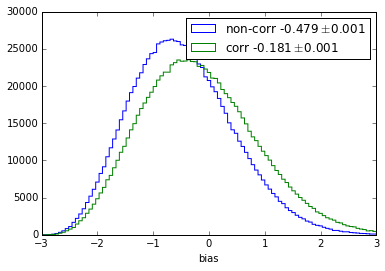

In [17]:
# plot it

mean_bias_non_corr, err_bias_non_corr = [f(all_bias_std) for f in (np.mean, stats.sem)]
mean_bias_corr, err_bias_corr = [f(all_bias_std_corr) for f in (np.mean, stats.sem)]
    
fig, ax = plt.subplots()
bins = np.linspace(-POPULATION_STD_DEV, POPULATION_STD_DEV, 100)
ax.hist(all_bias_std, bins, histtype='step', label='non-corr %.3f$\pm$%.3f' % (mean_bias_non_corr, err_bias_non_corr))
ax.hist(all_bias_std_corr, bins, histtype='step', label='corr %.3f$\pm$%.3f' % (mean_bias_corr, err_bias_corr))
ax.set_xlabel('bias')
ax.legend()
plt.show()

Can we draw a conclusions from these numbers? (answer=yes, detail in the rest of the lecture)

In [2]:
import ROOT

In [3]:
ROOT.PyConfig